In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

In [3]:
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = pd.read_csv("C:/Users/Teresa Barajas/SMDA201811DATA2/02-Homework/05-Matplotlib/Instructions/Pymaceuticals/data/mouse_drug_data.csv")
clinical_trial_data_to_load = pd.read_csv("C:/Users/Teresa Barajas/SMDA201811DATA2/02-Homework/05-Matplotlib/Instructions/Pymaceuticals/data/clinicaltrial_data.csv")

In [4]:
drug_df = pd.DataFrame(mouse_drug_data_to_load)
trial_df = pd.DataFrame(clinical_trial_data_to_load)

In [5]:
merged_df = pd.merge(drug_df, trial_df, on="Mouse ID", how="outer")
merged_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [6]:
grouped_df = merged_df.groupby(["Drug", "Timepoint"])
mean_tumor_volume = grouped_df["Tumor Volume (mm3)"].mean()
mean_tumor_volume_df = pd.DataFrame(mean_tumor_volume)
mean_tumor_volume_df

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
          25                  39.939528
          30                  38.769339
          35                  37.816839
          40                  36.958001
          45                  36.236114
Ceftamin  0                   45.000000
          5                   46.503051
          10                  48.285125
          15                  50.094055
          20                  52.157049
          25                  54.287674
          30                  56.769517
          35                  58.827548
          40                  61.467895
          45                  64.132421
Infubinol 0                   45.000000
          5                   47.062001
          10                  49.403909
          15                  51.296397
          20                  53.197691
          25                  55.715252
          30                  58.299397
          35                  60.742461
          40                  63.162824
          45                  65.755562
...                                 ...
Ramicane  0                   45.000000
          5                   43.944859
          10                  42.531957
          15                  41.495061
          20                  40.238325
          25                  38.974300
          30                  38.703137
          35                  37.451996
          40                  36.574081
          45                  34.955595
Stelasyn  0                   45.000000
          5                   47.527452
          10                  49.463844
          15                  51.529409
          20                  54.067395
          25                  56.166123
          30                  59.826738
          35                  62.440699
          40                  65.356386
          45                  68.438310
Zoniferol 0                   45.000000
          5                   46.851818
          10                  48.689881
          15                  50.779059
          20                  53.170334
          25                  55.432935
          30                  57.713531
          35                  60.089372
          40                  62.916692
          45                  65.960888

[100 rows x 1 columns]

In [7]:
SE_mean = grouped_df["Tumor Volume (mm3)"].sem()

In [8]:
SE_mean_df = pd.DataFrame(SE_mean)
SE_mean_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [40]:
table = mean_tumor_volume_df.pivot_table(index="Timepoint", columns="Drug",values="Tumor Volume (mm3)")
table.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [10]:
x_axis = np.arange(0,50,5)

In [11]:
Capomulin_data=table["Capomulin"]
Infubinol_data=table["Infubinol"]
Ketapril_data=table["Ketapril"]
Placebo_data=table["Placebo"]


In [12]:
standard_err_table= SE_mean_df.pivot_table(index="Timepoint", columns="Drug",values="Tumor Volume (mm3)")


In [13]:
Capomulin_error=standard_err_table["Capomulin"]
Infubinol_error=standard_err_table["Infubinol"]
Ketapril_error=standard_err_table["Ketapril"]
Placebo_error=standard_err_table["Placebo"]

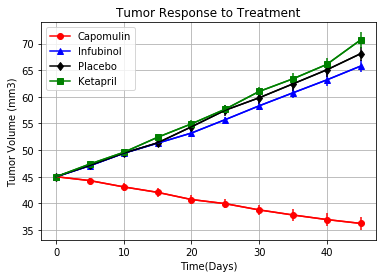

In [14]:
plt.plot(x_axis, Capomulin_data, marker="o", color="red")
plt.plot(x_axis, Infubinol_data, marker="^", color="blue")
plt.plot(x_axis, Placebo_data, marker="d", color="black")
plt.plot(x_axis, Ketapril_data, marker="s", color="green")
plt.title("Tumor Response to Treatment")
plt.xlabel("Time(Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(loc="upper left")
plt.grid()
plt.errorbar(x_axis,  Capomulin_data, Capomulin_error, color = "red")
plt.errorbar(x_axis, Infubinol_data, Infubinol_error, color="blue")
plt.errorbar(x_axis, Placebo_data, Placebo_error, color="black")
plt.errorbar(x_axis, Ketapril_data, Ketapril_error, color="green")
plt.savefig("C:/Users/Teresa Barajas/SMDA201811DATA2/02-Homework/05-Matplotlib/tumorresponse.png")

In [15]:
mean_met_site = grouped_df["Metastatic Sites"].mean()
mean__met_site_df = pd.DataFrame(mean_met_site)
mean__met_site_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [16]:
SE_mean_met_site = grouped_df["Metastatic Sites"].sem()
SE_mean__met_site_df = pd.DataFrame(SE_mean_met_site)
SE_mean__met_site_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [17]:
met_site_table = mean__met_site_df.pivot_table(index="Timepoint", columns="Drug",values="Metastatic Sites")
met_site_table.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [18]:
SE_mean_met_site_table = SE_mean__met_site_df.pivot_table(index="Timepoint", columns="Drug",values="Metastatic Sites")
SE_mean_met_site_table.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


In [19]:
Capomulin_met_data=met_site_table["Capomulin"]
Infubinol_met_data=met_site_table["Infubinol"]
Ketapril_met_data=met_site_table["Ketapril"]
Placebo_met_data=met_site_table["Placebo"]


In [20]:
Capomulin_met_error=SE_mean_met_site_table["Capomulin"]
Infubinol_met_error=SE_mean_met_site_table["Infubinol"]
Ketapril_met_error=SE_mean_met_site_table["Ketapril"]
Placebo_met_error=SE_mean_met_site_table["Placebo"]

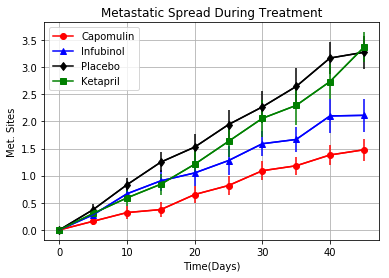

In [21]:
plt.plot(x_axis, Capomulin_met_data, marker="o", color="red")
plt.plot(x_axis, Infubinol_met_data, marker="^", color="blue")
plt.plot(x_axis, Placebo_met_data, marker="d", color="black")
plt.plot(x_axis, Ketapril_met_data, marker="s", color="green")
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Time(Days)")
plt.ylabel("Met. Sites")
plt.legend(loc="upper left")
plt.grid()
plt.errorbar(x_axis,  Capomulin_met_data, Capomulin_met_error, color = "red")
plt.errorbar(x_axis, Infubinol_met_data, Infubinol_met_error, color="blue")
plt.errorbar(x_axis, Placebo_met_data, Placebo_met_error, color="black")
plt.errorbar(x_axis, Ketapril_met_data, Ketapril_met_error, color="green")
plt.savefig("C:/Users/Teresa Barajas/SMDA201811DATA2/02-Homework/05-Matplotlib/met_spread.png")

In [22]:
count_mice = grouped_df["Mouse ID"].count()
count_mice_df = pd.DataFrame(count_mice)
count_mice_df.head()

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [23]:
mice_table = count_mice_df.pivot_table(index="Timepoint", columns="Drug",values="Mouse ID")
mice_table.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [24]:
Capomulin_mice_data=mice_table["Capomulin"]
Infubinol_mice_data=mice_table["Infubinol"]
Ketapril_mice_data=mice_table["Ketapril"]
Placebo_mice_data=mice_table["Placebo"]


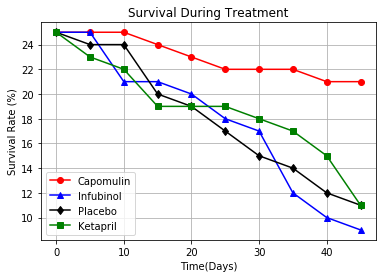

In [25]:
plt.plot(x_axis, Capomulin_mice_data, marker="o", color="red")
plt.plot(x_axis, Infubinol_mice_data, marker="^", color="blue")
plt.plot(x_axis, Placebo_mice_data, marker="d", color="black")
plt.plot(x_axis, Ketapril_mice_data, marker="s", color="green")
plt.title("Survival During Treatment")
plt.xlabel("Time(Days)")
plt.ylabel("Survival Rate (%)")
plt.legend(loc="lower left")
plt.grid()
plt.savefig("C:/Users/Teresa Barajas/SMDA201811DATA2/02-Homework/05-Matplotlib/survival.png")

In [62]:
start = table.iloc[0,:]
end = table.iloc[9,:]
change = ((end-start)/start)*100
change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [98]:
sort_change = change.sort_values()
t = (sort_change)
t

Drug
Ramicane    -22.320900
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Zoniferol    46.579751
Propriva     47.241175
Placebo      51.297960
Stelasyn     52.085134
Naftisol     53.923347
Ketapril     57.028795
dtype: float64

In [273]:

success = t[0:2:1]
failures = t[2:11:1]

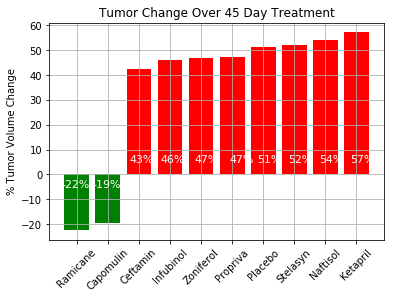

In [298]:
Drug = ["Ramicane","Capomulin", "Ceftamin", "Infubinol", "Zoniferol", "Propriva", "Placebo", "Stelasyn", "Naftisol", "Ketapril"]
labels = [list(sort_change)]
success_number = len(success)
failures_number = len(failures)
plots =plt.bar(range(success_number), list(success), color = "green")
plt.bar(range(success_number, success_number + failures_number), list(failures), color="red")
plt.ylabel("% Tumor Volume Change")
plt.grid()
plt.title("Tumor Change Over 45 Day Treatment")
plt.xticks(range(success_number +failures_number), list(Drug), rotation = 45)
plt.text(x = -.5,y=-5, s= "-22%", size = 11, color = "white")
plt.text(x = .5,y=-5, s= "-19%", size = 11, color = "white")
plt.text(x = 1.7,y= 5, s= "43%", size = 11, color = "white")
plt.text(x = 2.7,y=5, s= "46%", size = 11, color = "white")
plt.text(x = 3.8,y=5, s= "47%", size = 11, color = "white")
plt.text(x = 4.9,y=5, s= "47%", size = 11, color = "white")
plt.text(x = 5.8,y=5, s= "51%", size = 11, color = "white")
plt.text(x = 6.8,y=5, s= "52%", size = 11, color = "white")
plt.text(x = 7.8,y=5, s= "54%", size = 11, color = "white")
plt.text(x = 8.8,y=5, s= "57%", size = 11, color = "white")
plt.savefig("C:/Users/Teresa Barajas/SMDA201811DATA2/02-Homework/05-Matplotlib/greenorred.png")